# 전처리(N,M,R)

In [4]:
import numpy as np
import pandas as pd
import coin_preproc


N=15
M=40
R=1.8
df_coins = pd.read_csv("coin/target_coins.csv")
coins=df_coins["market"].tolist()
df_total = coin_preproc.preprocess("coin/raw/days/", coins, N,M,R)

print(df_total.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86449 entries, 0 to 86448
Data columns (total 46 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   change_rate0             86449 non-null  float64
 1   price_diff0              86449 non-null  float64
 2   low_price_change_rate0   86449 non-null  float64
 3   change_rate1             86449 non-null  float64
 4   price_diff1              86449 non-null  float64
 5   low_price_change_rate1   86449 non-null  float64
 6   change_rate2             86449 non-null  float64
 7   price_diff2              86449 non-null  float64
 8   low_price_change_rate2   86449 non-null  float64
 9   change_rate3             86449 non-null  float64
 10  price_diff3              86449 non-null  float64
 11  low_price_change_rate3   86449 non-null  float64
 12  change_rate4             86449 non-null  float64
 13  price_diff4              86449 non-null  float64
 14  low_price_change_rate4

# 데이터 스플릿

In [5]:
X = df_total.drop('y', axis=1)
y = df_total['y']

boundary = int(len(df_total)*0.8)
X_train = X.loc[:boundary]
y_train = y.loc[:boundary]
X_val = X.loc[boundary:]
y_val = y.loc[boundary:]
print("1비율",(y_train==1).mean(), (y_val==1).mean())

1비율 0.12158762290341238 0.10358588779641412


# 트레인

In [6]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier

# model = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=1)
model = ExtraTreesClassifier(n_estimators=100, random_state=123)
model.fit(X_train, y_train)
model.score(X_val, y_val)

c:\Users\ijun1\anaconda3\envs\aiot\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\ijun1\anaconda3\envs\aiot\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\ijun1\anaconda3\envs\aiot\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\ijun1\anaconda3\envs\aiot\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinsta

0.9039329091960671

# 시각화(혼동행렬)

c:\Users\ijun1\anaconda3\envs\aiot\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\ijun1\anaconda3\envs\aiot\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\ijun1\anaconda3\envs\aiot\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\ijun1\anaconda3\envs\aiot\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinsta

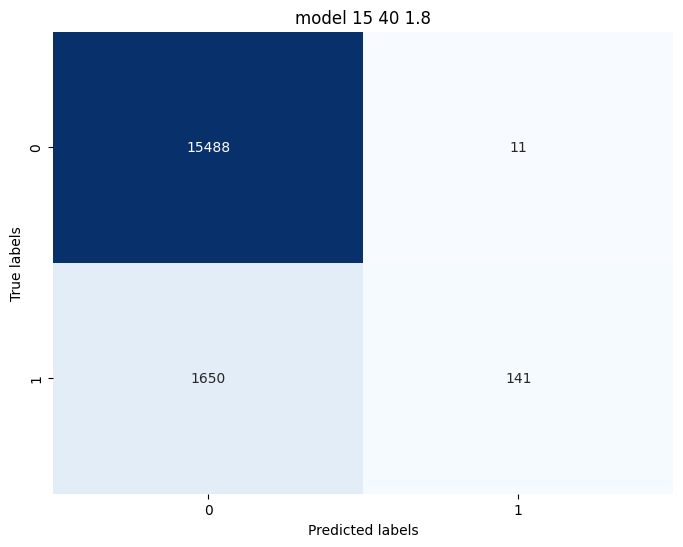

In [7]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 테스트 데이터로 예측
y_pred = model.predict(X_val)

# 혼동 행렬 생성
conf_matrix = confusion_matrix(y_val, y_pred)

# 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title(f"model {N} {M} {R}")
plt.show()

In [ ]:
from joblib import dump, load
dump(model, "coin/model/model.pkl")

# 시각화(피쳐 중요도)

[0.02453874 0.02350043 0.02335771 0.02319277 0.0231867  0.02310081
 0.02299117 0.02292832 0.02292178 0.02285577 0.0227723  0.02270794
 0.02268536 0.02255449 0.02253339 0.02233737 0.02225288 0.02219424
 0.0221839  0.02214474 0.02212554 0.02208495 0.02204406 0.02204346
 0.0220241  0.02198549 0.02194872 0.02191477 0.02188699 0.0218584
 0.02170723 0.02170601 0.02169002 0.02168657 0.02164087 0.02163327
 0.02160928 0.02156594 0.02156562 0.02150182 0.02142215 0.02139663
 0.0213459  0.02133591 0.02133546]
['price_diff0' 'change_rate0' 'price_diff1' 'price_diff4' 'price_diff2'
 'price_diff6' 'low_price_change_rate0' 'price_diff3' 'price_diff8'
 'price_diff14' 'price_diff7' 'low_price_change_rate1' 'price_diff5'
 'price_diff13' 'change_rate1' 'price_diff9' 'price_diff11'
 'low_price_change_rate13' 'price_diff10' 'low_price_change_rate3'
 'price_diff12' 'low_price_change_rate6' 'low_price_change_rate14'
 'change_rate2' 'low_price_change_rate5' 'low_price_change_rate2'
 'low_price_change_rate7' 'l

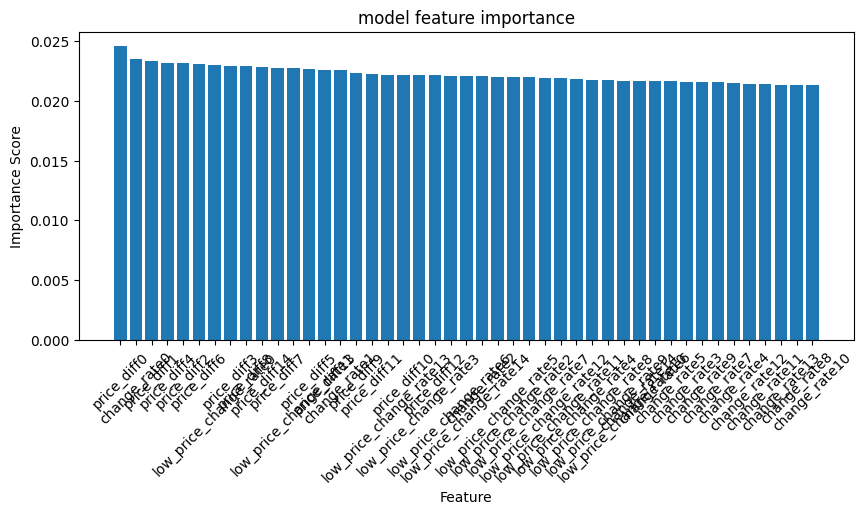

In [8]:
# 피처의 중요도 가져오기
feature_importances = model.feature_importances_

# 피처의 중요도를 기준으로 내림차순으로 정렬
indices = np.argsort(feature_importances)[::-1]

print(feature_importances[indices])
print(np.array(X.columns)[indices])

# 각 피처의 중요도를 막대 그래프로 시각화
plt.figure(figsize=(10, 4))
plt.bar(range(X.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(X.columns)[indices], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.title("model feature importance")
plt.show()

# 시각화(예측데이터가 특정 기간에 밀집되어 있다)

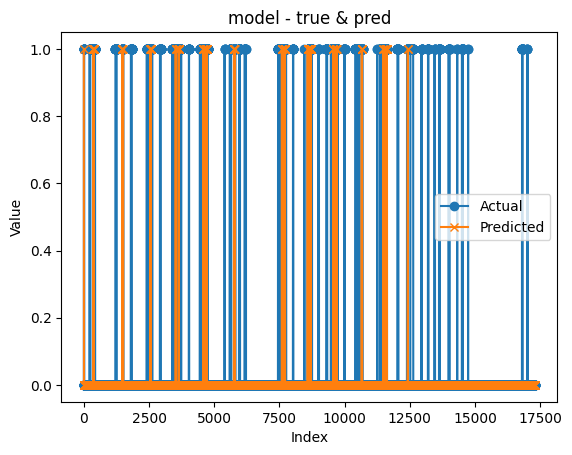

In [9]:
# 순서대로 나열된 데이터 시각화

plt.plot(np.arange(len(y_val)), y_val, label='Actual', marker='o')
plt.plot(np.arange(len(y_val)), y_pred, label='Predicted', marker='x')
plt.title('model - true & pred')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()
